(sampling-distr-mean-notebook)=
# Distribuzione campionaria della media e test t di Student

In [11]:
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns


In [3]:
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

sns.set_theme(palette="colorblind")

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = "svg"

L'inferenza frequentista si basa sul concetto fondamentale della distribuzione campionaria di una statistica. Nel tutorial presente, ci concentreremo sulla statistica della "media del campione". L'obiettivo principale è quello di costruire l'intera distribuzione campionaria della statistica della "media del campione" quando la popolazione da cui vengono estratti i campioni è nota e di piccole dimensioni. Inoltre, si verificheranno le proprietà di tale distribuzione, discusse in precedenza, per una migliore comprensione del suo comportamento. Infine, eseguiremo il test $t$ di Student, il più famoso test frequentista.

Per iniziare, definiamo la popolazione della variabile casuale $X$.

In [4]:
x = np.array([2, 4.5, 5, 5.5])
print(x)

[2.  4.5 5.  5.5]


Rappresentiamo la distribuzione della popolazione con un istogramma.

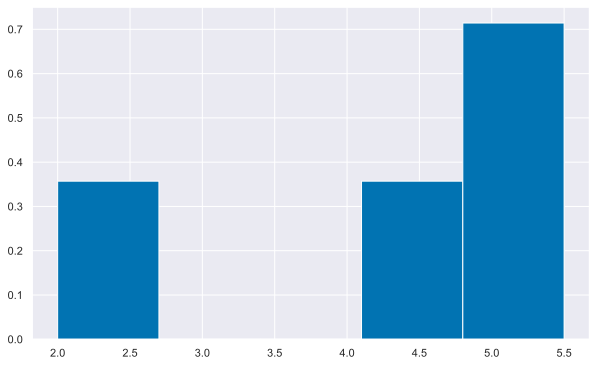

In [5]:
plt.hist(x, bins=5, density=True)
plt.show()

Calcoliamo la media e la varianza della popolazione.

In [6]:
np.mean(x)

4.25

In [7]:
np.var(x, ddof=0) 

1.8125

Estraiamo ora dalla popolazione tutti i possibili campioni di ampiezza $n$ = 2.

In [8]:
# Create an array with all the pairs of possible values
samples = np.array(list(itertools.product(x, repeat=2)))
print(samples)

[[2.  2. ]
 [2.  4.5]
 [2.  5. ]
 [2.  5.5]
 [4.5 2. ]
 [4.5 4.5]
 [4.5 5. ]
 [4.5 5.5]
 [5.  2. ]
 [5.  4.5]
 [5.  5. ]
 [5.  5.5]
 [5.5 2. ]
 [5.5 4.5]
 [5.5 5. ]
 [5.5 5.5]]


Per creare un array con tutte le possibili coppie di valori che possono essere estratti dall'array `x`, utilizziamo la funzione `product` del modulo `itertools`. Impostiamo l'argomento `repeat` a 2 per indicare che vogliamo coppie di valori. Successivamente, convertiamo la lista di tuple risultante in un array NumPy utilizzando la funzione `np.array`, e infine stampiamo il risultato. L'output ottenuto sarà un array con 16 righe e 2 colonne, che rappresenta tutte le possibili coppie di valori che possono essere estratti dall'array `x`.Calcoliamo ora la media di ogni campione di ampiezza $n$ = 2. L'insieme di tali valori costituisce la distribuzione campionaria delle medie di campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x`.

In [10]:
# total number of samples
len(list(itertools.product(x, x)))

16

In [18]:
# Create an array with the mean of each sample
means = np.mean(samples, axis=1)
print(means)

[2.   3.25 3.5  3.75 3.25 4.5  4.75 5.   3.5  4.75 5.   5.25 3.75 5.
 5.25 5.5 ]


L'istruzione precedente calcola la media della variabile `samples` lungo l'asse 1, ovvero per ogni riga. Il risultato viene assegnato alla variabile `means`. In altre parole, se `samples` è un array bidimensionale dove le righe rappresentano i diversi campioni e le colonne rappresentano le osservazioni all'interno di ogni campione, allora `means` sarà un array unidimensionale contenente la media di ogni campione.

I valori elencati costituiscono la distribuzione delle medie di campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x`. Una rappresentazione grafica di tale distribuzione è fornita qui sotto.

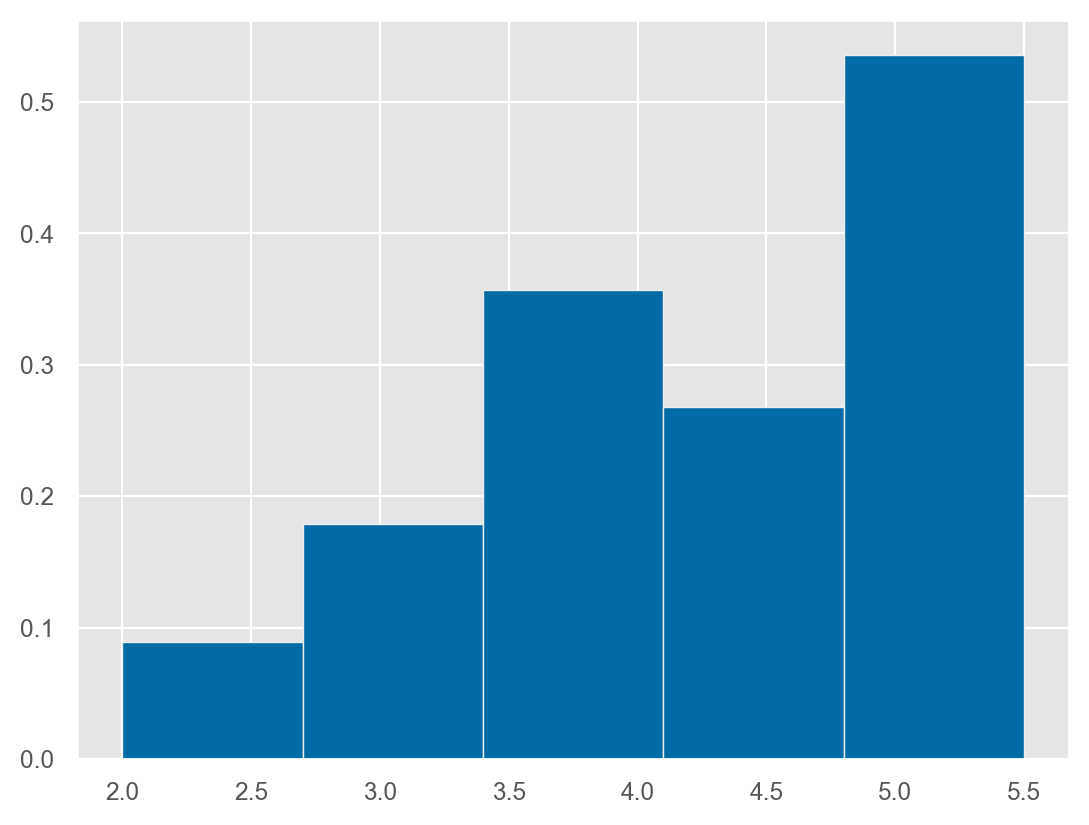

In [24]:
plt.hist(means, bins=5, density=True)
plt.show()

In [13]:
df = pd.DataFrame()
df["Samples"] = list(itertools.product(x, x))
df["x_bar"] = np.mean(list(itertools.product(x, x)), axis=1)
df

,Samples,x_bar
0,"(2.0, 2.0)",2.00
1,"(2.0, 4.5)",3.25
2,"(2.0, 5.0)",3.50
3,"(2.0, 5.5)",3.75
4,"(4.5, 2.0)",3.25
5,"(4.5, 4.5)",4.50
6,"(4.5, 5.0)",4.75
7,"(4.5, 5.5)",5.00
8,"(5.0, 2.0)",3.50
9,"(5.0, 4.5)",4.75


Calcoliamo ora la media della distribuzione campionaria delle medie di campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x`. Sappiamo che, se la variabile $X$ è distribuita con media $\mu$ e varianza $\sigma^2$, allora la media della distribuzione dei campioni casuali indipendenti di ampiezza $n$ = 2 sarà

$$
\mathbb{E}(\bar{X}) = \mu.
$$

Verifichiamo.

In [9]:
np.mean(x)

4.25

In [4]:
np.mean(means)

4.25

Sappiamo inoltre che la varianza della distribuzione dei campioni casuali indipendenti di ampiezza $n$ = 2 sarà

$$
\mathbb{V}(\bar{X}) = \frac{\sigma^2}{n}.
$$

Verifichiamo.

In [10]:
np.var(x, ddof=0) / 2

0.90625

In [11]:
np.var(means, ddof=0) 

0.90625

Consideriamo ora un particolare campione. Per esempio

In [13]:
observed_sample = np.array([5, 5.5])
print(observed_sample)

[5.  5.5]


Troviamo la media del campione:

In [16]:
sample_mean = np.mean(observed_sample)
print(sample_mean)

5.25


La media del campione è diversa dalla media della popolazione ($\mu$ = 4.25).

Troviamo la deviazione standard del campione:

In [14]:
sample_sd = np.std(observed_sample, ddof=1)
print(sample_sd)

0.3535533905932738


La deviazione standard del campione è diversa dalla deviazione standard della popolazione:

In [15]:
np.std(x, ddof=0)

1.346291201783626

Supponiamo di avere un'ipotesi nulla secondo cui la media della popolazione è pari a 4.5 e di ritenere che i dati provengano da una distribuzione normale. In questo caso, le medie campionarie con dimensione $n=2$ seguono una distribuzione normale con media 4.5 e deviazione standard campionaria $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{2}}$.

Si osservi che la media della distribuzione campionaria delle medie è specificata dall'ipotesi nulla e che non conosciamo il valore esatto di $\sigma$. Tuttavia, possiamo stimare $\sigma$ utilizzando la deviazione standard campionaria $s$.

## Test dell'ipotesi nulla

Con queste informazioni possiamo standardizzare la media osservata *all'interno della distribuzione campionaria delle medie*.

In [39]:
null_mean = 4.0
T = (sample_mean - null_mean) / (sample_sd / np.sqrt(2))
print(T)

5.0


Un importante teorema statistico afferma che la statistica calcolata segue una distribuzione nota, chiamata distribuzione $t$ di Student con $\nu = n - 1$ gradi di libertà.

L'obiettivo è comprendere quanto il valore osservato della statistica $T$ si discosti dal valore atteso. Nella distribuzione $t$ di Student, il valore atteso è 0. Per valutare questa differenza, viene calcolata la probabilità di osservare un valore di $T$ uguale a quello trovato nel campione o anche più estremo, nelle due code della distribuzione $T$ con $\nu = n - 1$ gradi di libertà.

Iniziamo calcolando la probabilità nella coda sinistra. 

In [42]:
df = 1 # gradi di libertà
# Calcolo della probabilità nella coda a sinistra
stats.t.cdf(-T, df)

0.06283295818900117

Dato che la distribuzione $t$ di Student è simmetrica, la probabilità nelle due code è uguale a 

In [43]:
2 * stats.t.cdf(-T, df)

0.12566591637800234

## Test t di Student

Il valore-p ottenuto indica la probabilità di ottenere una media campionaria uguale o ancora più estrema di quella osservata nel campione, se l'ipotesi nulla fosse vera. Si utilizza la distribuzione campionaria delle medie di campioni di ampiezza $n$ = 2 estratti dalla popolazione di interesse per calcolare il valore-p. L'ipotesi nulla specifica la media della popolazione e la varianza campionaria viene utilizzata come stima della varianza.

Se il valore-p è basso, significa che la statistica test ha prodotto un risultato molto estremo, ovvero molto diverso dal valore atteso previsto dall'ipotesi nulla. In questo caso, se il valore-p è inferiore a 0.05, il risultato del test statistico è considerato "statisticamente significativo" e l'ipotesi nulla viene rigettata. Ciò suggerisce che l'ipotesi nulla non è plausibile sulla base dei dati campionari.

Il test statistico che abbiamo eseguito è il test $t$ di Student per un campione, che viene utilizzato per confrontare le medie di due gruppi di dati appaiati, ad esempio pre e post-trattamento. Questo tipo di test può aiutare a valutare l'efficacia del trattamento e la differenza media tra le due misurazioni.

L'ipotesi nulla in questo caso è che il trattamento non abbia alcun effetto, e quindi la media delle differenze sia uguale a zero. Se il valore-p ottenuto dal test è inferiore a 0.05, il ricercatore può concludere che il trattamento è efficace (se la media post-trattamento è inferiore alla media pre-trattamento).

## Test $t$ di Student con `scipy.stats`

Verifichiamo il risultato numerico ottenuto usando la funzione `ttest_1samp` di `scipy.stats`.

In [57]:
null_mean = 4.0
stats.ttest_1samp(observed_sample, null_mean)

TtestResult(statistic=5.0, pvalue=0.12566591637800234, df=1)

Abbiamo impostato la media dell'ipotesi nulla a 4.0. Successivamente, chiamiamo la funzione `ttest_1samp`, passando come argomenti l'array di dati `observed_sample` e il valore della media sotto l'ipotesi nulla `null_mean`. La funzione restituisce la statistica $t$ e il valore-p corrispondente. 

Si noti che la funzione `ttest_1samp` assume che i dati siano distribuiti normalmente. Se questa ipotesi viene violata, i risultati del test t non sono validi. 

## Considerazioni conclusive

In questo tutorial abbiamo parlato di tre distribuzioni che sono alla base dell'inferenza frequentista:

1. La distribuzione della popolazione, con media $\mu$ e varianza $\sigma^2$. Questi valori sono spesso ignoti nella pratica.
2. La distribuzione del campione, con media $\bar{x}$ e varianza $s^2$. Questi valori sono noti.
3. La distribuzione campionaria della media, con media $\mu_{\bar{X}} = \mu$ e varianza $\frac{\sigma^2}{n}$. Anche questi valori sono spesso ignoti nella pratica.

Nell'approccio frequentista, la distribuzione campionaria della media viene costruita assumendo una media specificata dall'ipotesi nulla e utilizzando la varianza del campione per stimare la varianza della popolazione. Questo ci permette di specificare completamente la distribuzione campionaria della statistica di interesse. Se il campione è abbastanza grande, la distribuzione campionaria sarà approssimativamente normale grazie al teorema del limite centrale.

Una volta specificata la distribuzione campionaria della statistica di interesse (in questo caso, la media del campione), l'approccio frequentista calcola il valore "standardizzato" della media del campione all'interno della distribuzione campionaria costruita assumendo vera l'ipotesi nulla.

Il test di ipotesi consiste nel confronto tra il valore "standardizzato" della media del campione e la media della distribuzione campionaria costruita assumendo vera l'ipotesi nulla. Se la distanza tra questi due valori è grande, l'approccio frequentista conclude che l'ipotesi nulla non è plausibile.


